In [38]:
import csv
import requests
import json
import random
from random import shuffle
import pandas as pd
import progressbar
import pyvips
import numpy as np
import  requests, json, os
import glob
import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import gc
import random

import tensorflow as tf
import openslide

In [39]:
import pandas as pd
import numpy as np

data_labels = pd.read_csv("camelyon.csv")
center_1_files = os.listdir('/home/amir/center_1')
center_2_files = os.listdir('/home/amir/center_2')

neg_files_1 = list(data_labels[data_labels['stage']=="negative"][~data_labels['patient'].str.contains("zip")]['patient'].values)
pos_files_1 = list(data_labels[data_labels['stage']!="negative"][~data_labels['patient'].str.contains("zip")]['patient'].values)

center_1_neg = []
center_1_pos = []

for file in neg_files_1:
    if file in center_1_files:
        center_1_neg.append(file)
        
for file in pos_files_1:
    if file in center_1_files:
        center_1_pos.append(file)

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [ ]:

random.seed(1)

Image.MAX_IMAGE_PIXELS = 1000000000000000
Image.warnings.simplefilter('error', Image.DecompressionBombWarning)


def write_patch_open_slide(out_dir, open_slide_generator, fname, max_per_image, size):

    num_x_patches, num_y_patches = open_slide_generator.level_tiles[open_slide_generator.level_count-1]
    print("Generating for %s ..."%(fname))
    file_name = os.path.basename(fname)
    
    for patch_x in range(0,num_x_patches):
        for patch_y in range(0, num_y_patches):            
            img = open_slide_generator.get_tile(open_slide_generator.level_count-1, (patch_x, patch_y))
            background = Image.new("RGB", (size, size), (255, 255, 255))
            background.paste(img)
            ret2, otso = cv2.threshold(cv2.cvtColor(np.asarray(background), cv2.COLOR_BGR2GRAY),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            if ret2 < 150 and np.array(background).mean() > 150:
                # only sample 10% of the data
                coin = random.randint(1,10)
                if coin == 1:
                    plt.imsave(os.path.join(out_dir, file_name[:-5]) + '%d_%d' % (patch_x, patch_y) + '.jpg', background)

                    
                    
def patchify(files, prefix, max_process, data_dir):
    for file in files:
        if not os.path.exists(prefix):
            os.mkdir(prefix)
        try:
            if len(glob.glob(prefix+file[len(prefix):-7] + "*")) > 5:
                print("File %s seems to be processed... Skipping." % file)
            else:
                tile_generator = openslide.deepzoom.DeepZoomGenerator(openslide.OpenSlide(os.path.join(data_dir, file)), tile_size=256, overlap=0)
                write_patch_open_slide(prefix, tile_generator, os.path.join(data_dir, file), 100, 256)
        except Exception as ex:
            print(ex)
            print("Skipping %s" % file)
            raise ex


data_dir = "/home/amir/center_1/"

patchify(center_1_neg, "center_1_neg", 50, data_dir)
patchify(center_1_pos, "center_1_pos", 50, data_dir)



Generating for /home/amir/center_1/patient_020_node_0.tif ...
Generating for /home/amir/center_1/patient_020_node_3.tif ...
Generating for /home/amir/center_1/patient_021_node_2.tif ...


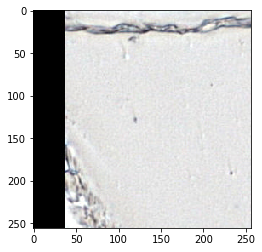

In [62]:
img = plt.imread("center_1_neg/patient_020_node_0_49.jpg")
plt.imshow(img)

In [70]:
write_patches_dir("/home/amir/center_1", center_1_neg + center_1_pos, "/home/amir/center_1/patches")

OSError: cannot identify image file '/home/amir/center_1/patient_020_node_0.tif'

Generating for /home/amir/A/A15/frames/x40/A15_03Ad.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_04Ad.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_02Db.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_00Bc.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_02Aa.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_02Dd.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_01Cd.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_02Bc.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_05Cb.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_05Bb.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_01Ab.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_03Ac.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_00Ca.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_05Cc.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_01Ca.tiff ...
Generating for /home/amir/A/A15/frames/x40/A15_03Dd.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A07/frames/x40/A07_03Cb.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_00Ab.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_02Cc.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_01Ab.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_02Ca.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_03Ad.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_00Da.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_02Dd.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_01Da.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_01Bd.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_00Dd.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_01Cd.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_00Bc.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_00Aa.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_02Da.tiff ...
Generating for /home/amir/A/A07/frames/x40/A07_01Bb.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A10/frames/x40/A10_00Bb.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_01Dc.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_01Db.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_01Ca.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_03Ab.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_03Bc.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_04Cb.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_00Ca.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_04Ad.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_03Ba.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_04Cc.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_03Ac.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_00Ac.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_02Bc.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_04Ac.tiff ...
Generating for /home/amir/A/A10/frames/x40/A10_02Ac.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A14/frames/x40/A14_06Cb.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_02Bb.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_00Ad.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_09Ba.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_05Bd.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_03Bd.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_07Dc.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_00Ba.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_08Da.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_01Da.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_00Aa.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_06Ab.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_00Ac.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_05Bb.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_05Ab.tiff ...
Generating for /home/amir/A/A14/frames/x40/A14_03Dd.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A12/frames/x40/A12_04Dc.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_00Bc.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_08Ac.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_06Cd.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_02Bb.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_05Ab.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_02Aa.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_08Dc.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_00Ac.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_08Ab.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_07Dd.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_07Bd.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_06Ba.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_05Cb.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_03Dd.tiff ...
Generating for /home/amir/A/A12/frames/x40/A12_00Cd.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A11/frames/x40/A11_00Ad.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_04Bd.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_07Da.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_01Da.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_04Ad.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_06Bc.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_05Bd.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_03Ba.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_07Db.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_01Bc.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_07Cd.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_05Dc.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_06Ac.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_07Bd.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_03Aa.tiff ...
Generating for /home/amir/A/A11/frames/x40/A11_02Ad.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A03/frames/x40/A03_02Bb.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_01Cc.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_04Bc.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_00Ba.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_01Cd.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_01Aa.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_05Cd.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_03Cb.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_01Db.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_00Db.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_02Ac.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_05Ca.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_00Ac.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_04Aa.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_03Ac.tiff ...
Generating for /home/amir/A/A03/frames/x40/A03_03Aa.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A04/frames/x40/A04_02Ab.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_03Da.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_01Bb.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_07Bd.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_00Ba.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_06Aa.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_06Cc.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_02Da.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_00Dd.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_03Ac.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_04Ba.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_03Cc.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_03Bc.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_05Bb.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_02Aa.tiff ...
Generating for /home/amir/A/A04/frames/x40/A04_06Ad.tiff ...
Generating for /home/ami

Generating for /home/amir/A/A18/frames/x40/A18_00Ac.tiff ...
Generating for /home/amir/A/A18/frames/x40/A18_03Ca.tiff ...
Generating for /home/amir/A/A18/frames/x40/A18_04Cc.tiff ...
Generating for /home/amir/A/A18/frames/x40/A18_02Dd.tiff ...
Generating for /home/amir/A/A18/frames/x40/A18_04Bd.tiff ...
Generating for /home/amir/A/A18/frames/x40/A18_02Ca.tiff ...
Generating for /home/amir/A/A18/frames/x40/A18_01Cc.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_06Ca.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_00Ad.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_01Ba.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_03Aa.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_05Bb.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_02Ca.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_06Bb.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_00Db.tiff ...
Generating for /home/amir/A/A05/frames/x40/A05_05Ca.tiff ...
Generating for /home/ami

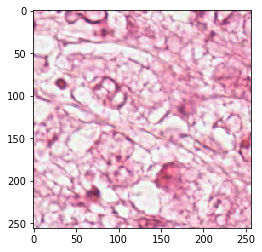

In [13]:
write_patches_dir("/home/amir/A/A*/frames/x40/*.tiff", "/home/amir/A/patches")

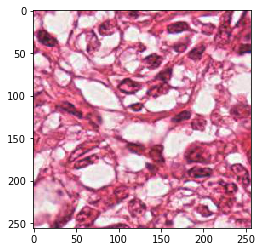

In [30]:
img = plt.imread("/home/amir/test/A03_00Aa/A03_00Aa1_0.jpg")
plt.imshow(img)

In [1]:
import csv
import requests
import json
import random
from random import shuffle
import pandas as pd
import progressbar
import os.path

random.seed(1367)

file_endpt = 'https://api.gdc.cancer.gov/files/%s?fields=file_id,cases.samples.tissue_type,cases.project.project_id'

download_dict = {"TCGA-LUAD":[], "TCGA-LUSC":[]}
max_files = 50

file_list = []

with open("manifest.txt") as f:
    first_row = True
    for row in csv.reader(f, delimiter='\t'):
        if first_row:
            first_row = False
            continue
        file_id = row[0]
        file_list.append(file_id)

shuffle(file_list)

df = pd.DataFrame()

counter = 0

def download_file(url, path, cancer_type):
    r = requests.get(url, stream=True)
    if not os.path.isfile(path):
        with open(path, 'wb') as f:
            bar = progressbar.ProgressBar(prefix=path + "(%s)" % cancer_type)
            total_length = int(r.headers.get('content-length'))
            for chunk in bar(r.iter_content(chunk_size=1024), max_value=(total_length/1024) + 1): 
                if chunk:
                    f.write(chunk)
                    f.flush()
    else:
        print("file %s already exists... skipping." % path)

for file_id in file_list:
    continue_download = False
    for value in download_dict.values():
        if len(value) < max_files:
            continue_download = True
    
    if continue_download:
        response = requests.get(file_endpt % file_id)
        data = response.json()
        counter += 1
        project_id = data['data']['cases'][0]['project']['project_id']
        if project_id not in download_dict:
                download_dict[project_id] = []
                
        if len(download_dict[project_id]) < max_files:
            download_dict[project_id].append(file_id)
    else:
        break
        
for key, value in download_dict.items():
    for file in value:
        try:
            download_file('https://api.gdc.cancer.gov/data/' + file, file+ ".tar.gz", key)
        except Exception as ex:
            try:
                print("Error... retrying.")
                download_file('https://api.gdc.cancer.gov/data/' + file, file+ ".tar.gz", key)
            except Exception as ex:
                print("Failed after retry. Skipping.")

KeyboardInterrupt: 

In [1]:
import pyvips
import numpy as np
import requests, json, os
import glob
import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import gc
from skimage import io, color
import random

random.seed(1)

Image.MAX_IMAGE_PIXELS = 1000000000000000
Image.warnings.simplefilter('error', Image.DecompressionBombWarning)

downloaded_files = glob.glob("tcga_raw/*-*-*-*-*.tar.gz")
out_dir = "tcga_patches/"
file_endpt = 'https://api.gdc.cancer.gov/files/%s?fields=file_id,cases.samples.tissue_type,cases.project.project_id'
max_files_to_process = 2

% mkdir -p "tcga_patches"

downloaded_dict = {"TCGA-LUAD":[], "TCGA-LUSC":[]}

format_to_dtype = {
    'uchar': np.uint8,
    'char': np.int8,
    'ushort': np.uint16,
    'short': np.int16,
    'uint': np.uint32,
    'int': np.int32,
    'float': np.float32,
    'double': np.float64,
    'complex': np.complex64,
    'dpcomplex': np.complex128,
}

#downloaded_files=["6611a7e1-175b-4d2d-9915-c25e7361b0c6"]



def write_patch_vips(out_dir, image, fname, max_per_image, size):
    width = int(image.width)
    height = int(image.height)
    num_x_patches = min(int(width / size), max_per_image)
    num_y_patches = min(int(height/ size), max_per_image)
    print("Generating for %s ..."%(fname))
    file_name = os.path.basename(fname)
    
    for patch_x in range(0,num_x_patches):
        for patch_y in range(0, num_y_patches):            
            tile = image.crop(patch_x * size, patch_y * size, size, size)
            mem_img = tile.write_to_memory()
            img = Image.fromarray(np.frombuffer(mem_img, dtype=np.uint8).reshape(tile.width, tile.height, 4))
            background = Image.new("RGB", (size, size), (255, 255, 255))
            background.paste(img, mask=img.split()[3]) # 3 is the alpha channel
            ret2, otso = cv2.threshold(cv2.cvtColor(np.asarray(background), cv2.COLOR_BGR2GRAY),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            if ret2 < 150:
                # only sample 10% of the data
                coin = random.randint(1,10)
                if coin == 1:
                    tile.jpegsave(os.path.join(out_dir, file_name[:-5]) + '%d_%d' % (patch_x, patch_y) + '.jpg')

for file in downloaded_files:
    uid = file[len("tcga_raw") + 1:-7]
    response = requests.get(file_endpt % uid)
    data = response.json()
    project_id = data['data']['cases'][0]['project']['project_id']
    if len(glob.glob(out_dir + project_id + "/*" + uid + "*")) > 0:
        print ("UID %s seems to have been processed. Skipping... " % uid)
        continue
    try:
        if len(downloaded_dict[project_id]) < max_files_to_process:
            img = pyvips.Image.new_from_file(file, access='sequential')
            write_patch_vips(out_dir + project_id, img, file, 100, 256)
    except Exception as ex:
        print(ex)
        print("Skipping %s" % uid)


UID f744590c-9fa2-478a-8792-f9eac009f001 seems to have been processed. Skipping... 
UID c3f2c0f3-5b81-4950-b633-8a312e24f8f8 seems to have been processed. Skipping... 
UID cb2144f7-2098-4bba-b413-d531d0ba8e59 seems to have been processed. Skipping... 
UID 0c568915-802b-4f8b-8b8a-7d119ea9c3e4 seems to have been processed. Skipping... 
UID 1816c489-e65c-4c52-978c-00ae83b8b4a4 seems to have been processed. Skipping... 
UID 6611a7e1-175b-4d2d-9915-c25e7361b0c6 seems to have been processed. Skipping... 
UID 7916cc08-7efa-4dc6-b5e7-9df0a54099b2 seems to have been processed. Skipping... 
UID 9202ae85-b228-4641-a859-c6a31a0fc940 seems to have been processed. Skipping... 
UID b172380c-ba65-4bbf-926d-88d53f716349 seems to have been processed. Skipping... 
UID 3c4e00e1-2733-48b0-9053-26b4c21af303 seems to have been processed. Skipping... 
UID 7eb775bf-0d79-47cb-997f-36b4f7185cfe seems to have been processed. Skipping... 
UID 23b6a41d-73fb-4520-ab4c-1396819e19b5 seems to have been processed. Skipp

UID cde782c8-fab1-4eed-8bce-6867b28f45eb seems to have been processed. Skipping... 
UID b4ea4bb5-d69c-4127-b182-e8ba7f199387 seems to have been processed. Skipping... 
UID 1446ff1b-7038-42d3-a0e4-164f0b3fb872 seems to have been processed. Skipping... 
UID 7614269b-73cf-422c-9066-b6a5e0d13933 seems to have been processed. Skipping... 
UID d15a27b4-bb2b-4d6b-b30c-acae949d325b seems to have been processed. Skipping... 
UID a1a4d13e-fc19-4b4f-92b5-1787e2148231 seems to have been processed. Skipping... 
UID 66763cb4-df13-43b2-af36-391da4ff3b21 seems to have been processed. Skipping... 
UID a5b5d424-fedb-4d71-bd54-cbe3c3e675ce seems to have been processed. Skipping... 
UID fc2e3d44-5bb2-4ca3-8b12-12e46099c0be seems to have been processed. Skipping... 
UID 9ceec9ee-bb9f-4f2f-af1a-2d9bca2df427 seems to have been processed. Skipping... 
UID aa0e4621-4082-4cf9-9ea1-ebb46b10896b seems to have been processed. Skipping... 
UID 81bd1a08-a5be-4800-a3ed-0dc533ba39d2 seems to have been processed. Skipp

In [ ]:
import matplotlib.pyplot as plt
from random import shuffle
import random
random.seed(2)

patches = glob.glob("/home/shared/stanford/cs231n/project/tcga_patches/*.jpg")
shuffle(patches)
patches = patches[0:16]
w=int(np.sqrt(len(patches)))
h=int(np.sqrt(len(patches)))

print(w, h)

fig=plt.figure(figsize=(256, 256))
columns = w
rows = h
for i in range(1, len(patches)):
    img = plt.imread(patches[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [5]:
import cv2

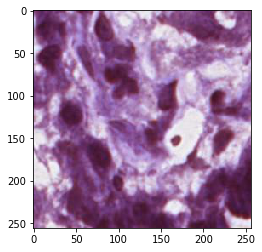

In [43]:
img = cv2.imread("/home/shared/stanford/cs231n/project/tcga_patches/TCGA-LUAD/f744590c-9fa2-478a-8792-f9eac009f001.t45_37.jpg")
plt.imshow(img)



In [12]:
del(background)